In [29]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import tkinter as tk
from PIL import Image, ImageTk
import networkx as nx
import time

In [30]:
G = nx.DiGraph()
G.add_nodes_from( ['Acapulco','Puebla','CDMX','Morelia','Uruapan','San Luis Potosi','Tampico','Piedras Negras','Culiacan','Abraham Gonzalez','Nogales','Guaymas','Loreto','Manuel Marquez de Leon','Los Cabos'] )
G.add_edges_from([
('Cozumel', 'Tampico', {'weight': 17}),
('Ciudad del Carmen', 'Cozumel', {'weight': 15}),
('Angel Albino Corzo', 'Ciudad del Carmen', {'weight': 11}),
('Angel Albino Corzo', 'Minatitlan', {'weight': 15}),
('Angel Albino Corzo', 'Acapulco', {'weight': 1}),
('Minatitlan', 'Ciudad del Carmen', {'weight': 16}),
('Minatitlan', 'Veracruz', {'weight': 18}),
('Acapulco', 'Morelia', {'weight': 14}),
('Acapulco', 'Uruapan', {'weight': 14}),
('Puebla', 'Veracruz', {'weight': 12}),
('Puebla', 'Acapulco', {'weight': 19}),
('CDMX', 'Acapulco', {'weight': 4}),
('Morelia', 'CDMX', {'weight': 15}),
('Morelia', 'San Luis Potosi', {'weight': 11}),
('Uruapan', 'Culiacan', {'weight': 15}),
('San Luis Potosi', 'Abraham Gonzalez', {'weight': 15}),
('Tampico', 'Puebla', {'weight': 7}),
('Tampico', 'CDMX', {'weight': 8}),
('Tampico', 'pathan Luis Potosi', {'weight': 11}),
('Piedras Negras', 'San Luis Potosi', {'weight': 11}),
('Piedras Negras', 'Tampico', {'weight': 16}),
('Culiacan', 'Piedras Negras', {'weight': 8}),
('Culiacan', 'Guaymas', {'weight': 16}),
('Abraham Gonzalez', 'Piedras Negras', {'weight': 15}),
('Nogales', 'Abraham Gonzalez', {'weight': 6}),
('Guaymas', 'Abraham Gonzalez', {'weight': 18}),
('Guaymas', 'Nogales', {'weight': 5}),
('Guaymas', 'Loreto', {'weight': 13}),
('Loreto', 'Manuel Marquez de Leon', {'weight': 15}),
('Manuel Marquez de Leon', 'Culiacan', {'weight': 14}),
('Manuel Marquez de Leon', 'Los Cabos', {'weight': 10}),
])

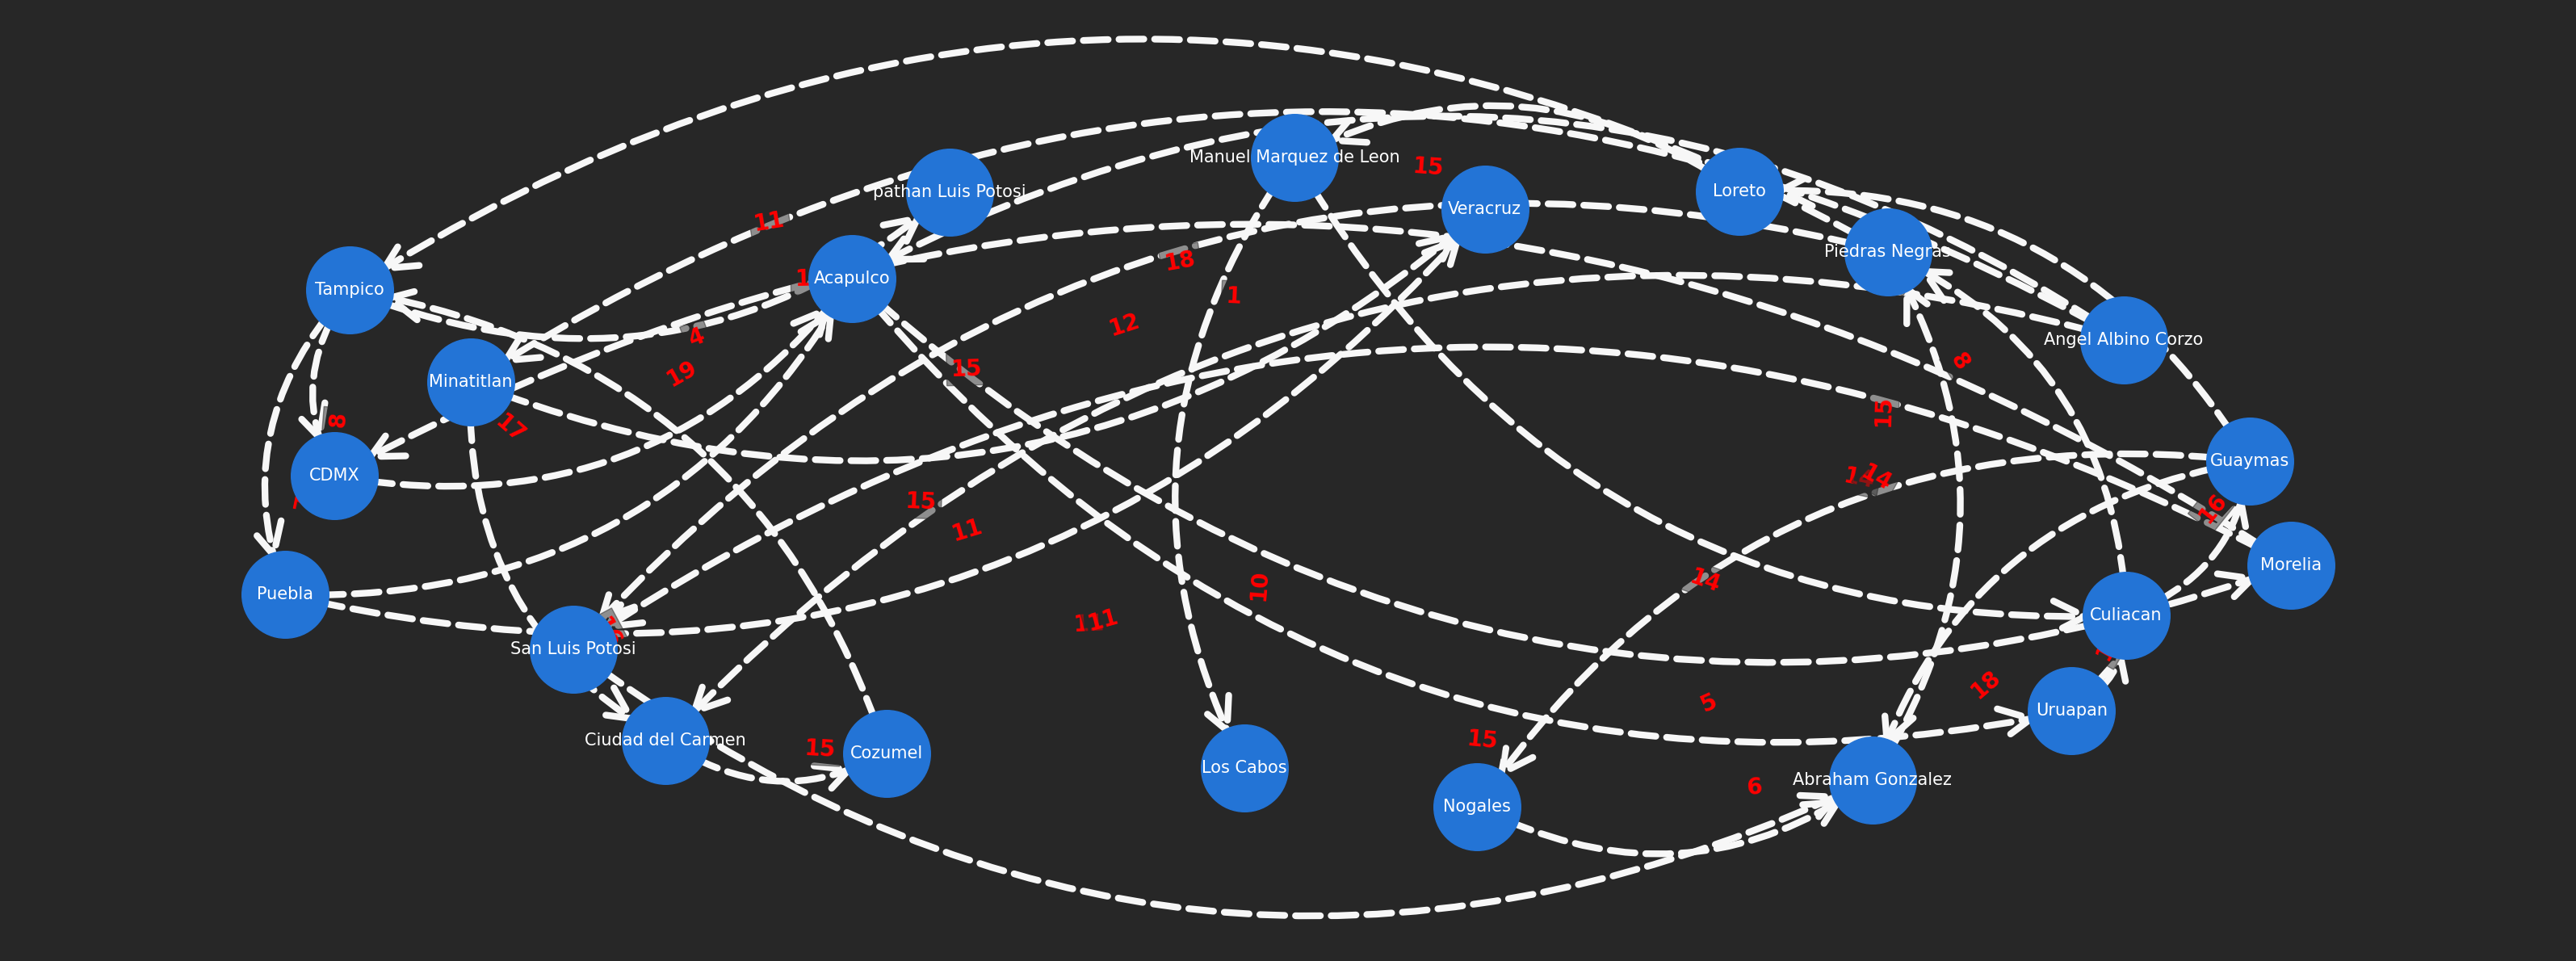

In [31]:
#Hacer imagen del grafo
# se define el ancho y alto de la figura/gráfica/imagen y el color de fondo de la imagen (en este caso sin color de fondo)
plt.figure(3,figsize=(32,12), facecolor='#272727', edgecolor='#272727', clear=True)
#poner el fondo de la imagen en #272727
plt.gca().set_facecolor('#272727')

# nodes
pos = nx.spring_layout(G, seed=732128, k=5) # semilla para generar el layout, la k es la distancia entre nodos
# Para que no se toquen los nodos

nx.draw_networkx_nodes(G, pos, node_color = '#2374D6', node_size = 6000)
nx.draw_networkx_labels(G, pos, font_size=15, font_family="sans-serif", font_color='white')

nx.draw_networkx_edges(G, pos, edgelist=G.edges, width=6, alpha=1, edge_color="#F7F7F7", style="dashed", arrowsize=70, arrowstyle="->", connectionstyle="arc3,rad=0.3", min_source_margin=30, min_target_margin=30)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=20,font_color='red', font_family="sans-serif", font_weight="bold", label_pos=0.3, rotate=True, bbox=dict(facecolor="#272727", alpha=0.5, edgecolor="#272727"))
# guardar imagen en formato png del grafo

# ploting
ax = plt.gca()
ax.margins(0.08)

plt.axis("off")
plt.tight_layout()
plt.savefig("graph.png", format="PNG", facecolor='#272727', edgecolor='#272727')
plt.show()


In [32]:
#leer la imagen del grafo
img_grafo = cv.imread('graph.png')
#corregir el color de la imagen
img_grafo = cv.cvtColor(img_grafo, cv.COLOR_BGR2RGB)
#redimensionar la imagen sin alterar la proporcion
img_grafo = cv.resize(img_grafo, (600, 300))

In [33]:
# Breath First Search

def bfs(graph, start, target):
    start_time = time.time()
    if start not in G.nodes:
        return "El nodo inicial no está en el grafo"
    elif target not in G.nodes:
        return "El nodo objetivo no está en el grafo"
    queue = [[start]]                           # Inicializar la cola con el nodo inicial
    visited = set()                             # Inicializar el conjunto de nodos visitados
    while queue:                                # Mientras la cola no esté vacía
        path = queue.pop(0)                     # Sacar el primer camino de la cola
        node = path[-1]                         # Obtener el último nodo del camino
        if node == target:                      # Si el nodo es el objetivo
            path =  " → ".join(path)            # Convierte la lista en un string separado por " -> "
            end_time = time.time()
            return path + f"   Tiempo: {end_time - start_time}" # Agrega el tiempo al final del string
        if node not in visited:                 # Si el nodo no ha sido visitado
            for adjacent in graph[node]:        # Para cada nodo adyacente
                new_path = list(path)           # Copiar el camino actual
                new_path.append(adjacent)       # Agregar el nodo adyacente al camino
                queue.append(new_path)          # Agregar el nuevo camino a la cola
        visited.add(node)                       # Marcar el nodo como visitado
    # Si no se encontró un camino
    return "No se encontró una ruta"

# Djikstra Search

def dijkstra(G, start, target): 
    if start not in G.nodes:
        return "El nodo inicial no está en el grafo"
    elif target not in G.nodes:
        return "El nodo objetivo no está en el grafo"
    Distancia = {}              
    Prev = {}                   
    Q = []                      
    for node in G.nodes:
        Distancia[node] = float('inf') # infinito
        Prev[node] = None
        Q.append(node)

    Distancia[start] = 0
    while Q:
        u = min(Q, key=lambda node: Distancia[node])
        Q.remove(u)
        for v in G.neighbors(u):
            alt = Distancia[u] + G.edges[u, v]['weight']
            if alt < Distancia[v]:
                Distancia[v] = alt
                Prev[v] = u
    
    if Distancia[target] == float('inf'):
        return "No se encontró una ruta"
    
    path = []
    u = target
    while Prev[u]: # return el path con el formato: "start -> ... -> target   costo: ..."
        path.insert(0, u)
        u = Prev[u]
    path.insert(0, u)
    path = " → ".join(path)          # Convierte la lista en un string separado por " -> "   
    path += f"   costo: {Distancia[target]}"   # Agrega el costo al final del string
    return path

# Depth First Search

def depth_first_search(Graph, Start, Target):
    if Start not in G.nodes:
        return "El nodo inicial no está en el grafo"
    elif Target not in G.nodes:
        return "El nodo objetivo no está en el grafo"
    lista = []
    path = []
    lista.append(Start)
    while lista:    # Mientras la lista no este vacia
        current_node = lista.pop()
        if current_node not in path:
            path.append(current_node)
            if current_node == Target:
                path =  " → ".join(path)
                return path
            for neighbor in Graph[current_node]:
                lista.append(neighbor)
    return "No se encontró una ruta"

# Depth Limited Search

def DepthLimitedSearch(Graph, Start, Target, Limit): #encontrar el path de un nodo a otro con un limite de profundidad
    if Start not in G.nodes:
        return "El nodo inicial no está en el grafo"
    elif Target not in G.nodes:
        return "El nodo objetivo no está en el grafo"
    lista = []
    path = []
    lista.append(Start)
    while Limit:    # Mientras la lista no este vacia
        current_node = lista.pop()
        if current_node not in path:
            path.append(current_node)
            if current_node == Target:
                path =  " → ".join(path)
                return path
            for neighbor in Graph[current_node]:
                lista.append(neighbor)
        Limit -= 1
    return "No se encontró una ruta"


# Iterative Deepening Search

def DLS(G, Start, Target, Limit):
    if Start == Target:
        return [Start]
    if Limit == 0:
        return []
    if Limit > 0:
        for neighbor in G.neighbors(Start):
            path = DLS(G, neighbor, Target, Limit-1)
            if path:
                return [Start] + path
    return []

def IterativeDeepeningSearch(G, Start, Target, MaxDepth): #MaxDepth es la profundidad máxima
    if Start not in G.nodes:
        return "El nodo inicial no está en el grafo"
    elif Target not in G.nodes:
        return "El nodo objetivo no está en el grafo" 
    for depth in range(MaxDepth):   # range(MaxDepth) genera una lista de valores de 0 a MaxDepth-1 
        path = DLS(G, Start, Target, depth)
        if path:
            path =  " → ".join(path)          # Convierte la lista en un string separado por " -> "
            path += f"   Iteraciones: {depth}" # Agrega el número de iteraciones
            return path
    return "No se encontró una ruta"

In [34]:
print(bfs(G, 'Acapulco', 'Los Cabos'))
print(dijkstra(G, 'Acapulco', 'Los Cabos'))
print(depth_first_search(G, 'Acapulco', 'Los Cabos'))
print(DepthLimitedSearch(G, 'Acapulco', 'Los Cabos', 10))
print(IterativeDeepeningSearch(G, 'Acapulco', 'Los Cabos', 10))

Acapulco → Uruapan → Culiacan → Guaymas → Loreto → Manuel Marquez de Leon → Los Cabos
Acapulco → Uruapan → Culiacan → Guaymas → Loreto → Manuel Marquez de Leon → Los Cabos   costo: 83
Acapulco → Uruapan → Culiacan → Guaymas → Loreto → Manuel Marquez de Leon → Los Cabos
Acapulco → Uruapan → Culiacan → Guaymas → Loreto → Manuel Marquez de Leon → Los Cabos
Acapulco → Uruapan → Culiacan → Guaymas → Loreto → Manuel Marquez de Leon → Los Cabos   Iteraciones: 6


In [35]:
# Funciones

def run_all():  # Ejecuta todos los algoritmos de búsqueda a la vez
    start = entry_start.get()
    target = entry_target.get()
    limit = entry_limit.get()
    max_limit = entry_max_limit.get()
    #validar start y target para que esten en formato Title
    if start.title() in G.nodes:
        start = start.title() 
    elif start.upper() in G.nodes:    # Validar para CDMX, cdmx, Cdmx, CDmx, etc.
        start = start.upper()
    elif start.lower() in G.nodes:
        start = start.lower()
    else:
        start = start
    if target.upper() in G.nodes:
        target = target.upper()
    else:
        target = target.title()
    #validar limit para que sea un entero
    try:
        max_limit = int(max_limit)
        limit = int(limit)
    except:
        max_limit = 0
        limit = 0
    if limit < 0:
        max_limit = 0
        limit = 0
    ruta = "Depth-First-Search: " + bfs(G, start, target) + "\nDijkstra: " + dijkstra(G, start, target) + "\nDepth-First-Search: " + depth_first_search(G, start, target) + "\nDepth-Limited-Search: " + DepthLimitedSearch(G, start, target, limit) + "\nIterative-Deepening-Search: " + IterativeDeepeningSearch(G, start, target, max_limit)
    label_ruta.config(text=ruta)
    label_ruta.pack()
    return ruta

def buscar_ruta_BFS():
    start = entry_start.get()
    target = entry_target.get()
    #validar start y target para que esten en formato Title
    if start.upper() in G.nodes:    
        start = start.upper()
    else:
        start = start.title()
    if target.upper() in G.nodes:
        target = target.upper()
    else:
        target = target.title()
    ruta = bfs(G, start, target)
    label_ruta.config(text=ruta)
    label_ruta.pack()
    return ruta

def buscar_ruta_Dijkstra():
    start = entry_start.get()
    target = entry_target.get()
    #validar start y target para que esten en formato Title
    if start.upper() in G.nodes:    
        start = start.upper()
    else:
        start = start.title()
    if target.upper() in G.nodes:
        target = target.upper()
    else:
        target = target.title()
    ruta = dijkstra(G, start, target)
    label_ruta.config(text=ruta)
    label_ruta.pack()
    return ruta

def buscar_ruta_DFS():
    start = entry_start.get()
    target = entry_target.get()
    #validar start y target para que esten en formato Title
    if start.upper() in G.nodes:    
        start = start.upper()
    else:
        start = start.title()
    if target.upper() in G.nodes:
        target = target.upper()
    else:
        target = target.title()
    ruta = depth_first_search(G, start, target)
    label_ruta.config(text=ruta)
    label_ruta.pack()
    return ruta

def buscar_ruta_DLS():
    start = entry_start.get()
    target = entry_target.get()
    limit = entry_limit.get()
    #validar start, target y limit para que esten en formato Title
    if start.upper() in G.nodes:    
        start = start.upper()
    else:
        start = start.title()
    if target.upper() in G.nodes:
        target = target.upper()
    else:
        target = target.title()
    try:
        limit = int(limit)
    except:
        limit = 0
    if limit < 0:
        limit = 0
    ruta = DepthLimitedSearch(G, start, target, limit)
    label_ruta.config(text=ruta)
    label_ruta.pack()
    return ruta

def buscar_ruta_IDS():
    start = entry_start.get()
    target = entry_target.get()
    limit = entry_max_limit.get()
    #validar start, target y limit para que esten en formato Title
    if start.upper() in G.nodes:
        start = start.upper()
    else:
        start = start.title()
    if target.upper() in G.nodes:
        target = target.upper()
    else:
        target = target.title()
    try:
        limit = int(limit)
    except:
        limit = 0
    if limit < 0:
        limit = 0
    ruta = IterativeDeepeningSearch(G, start, target, limit)
    label_ruta.config(text=ruta)
    label_ruta.pack()
    return ruta

# Ventana principal
window = tk.Tk()
window.title("Ventana Principal")
window.configure(bg="#272727")
window.geometry("1920x1080")

# Título
title = tk.Label(window, text="ALGORITMOS DE BUSQEUDA", font=("Impact", 50), bg="#272727", fg="#F7F7F7")
title.pack()

# Label Para mostrar el grafo
label_graf = tk.Label(window, bg="#272727")
label_graf.pack()
#convertir la imagen a un formato compatible con tkinter
img_grafo = Image.fromarray(img_grafo)
img_grafo = ImageTk.PhotoImage(img_grafo)
label_graf.config(image=img_grafo)

#Hacer el frame para las cajas de texto
frameinput = tk.Frame(window, bg="#272727")
frameinput.pack(pady=10)

# Cajas de texto para ingresar el nodo inicial y final (strart, target, limit, max_limit)

# Start 
label_start = tk.Label(frameinput, text="Nodo Inicial", font=("Cooper Std Black", 15), bg="#272727", fg="#F7F7F7")
label_start.pack()
entry_start = tk.Entry(frameinput, font=("Cooper Std Black", 15), bg="#EAE4DA", fg="#34495E")
entry_start.pack()
entry_start.focus() # Pone el cursor en la caja de texto
entry_start.bind("<Return>", lambda e: entry_target.focus()) # Al presionar "Enter" pasa al siguiente entry
entry_start.bind("<Tab>", lambda e: entry_target.focus()) # Al presionar "Tab" pasa al siguiente entry

# Target
label_target = tk.Label(frameinput, text="Nodo Final", font=("Cooper Std Black", 15), bg="#272727", fg="#F7F7F7")
label_target.pack()
entry_target = tk.Entry(frameinput, font=("Cooper Std Black", 15), bg="#EAE4DA", fg="#34495E")
entry_target.pack()
entry_target.bind("<Return>", lambda e: entry_limit.focus()) 
entry_target.bind("<Tab>", lambda e: entry_limit.focus()) 

# Limit
label_limit = tk.Label(frameinput, text="Límite Máximo", font=("Cooper Std Black", 15), bg="#272727", fg="#F7F7F7")
label_limit.pack()
entry_limit = tk.Entry(frameinput, font=("Cooper Std Black", 15), bg="#EAE4DA", fg="#34495E")
entry_limit.config(validate="key", validatecommand=(entry_limit.register(lambda text: text.isdigit() or text == ""), "%P")) #que solo acepte numeros enteros
entry_limit.pack()
entry_limit.bind("<Return>", lambda e: entry_max_limit.focus()) 
entry_limit.bind("<Tab>", lambda e: entry_max_limit.focus())

# Max Limit
label_max_limit = tk.Label(frameinput, text="Profundidad Máxima", font=("Cooper Std Black", 15), bg="#272727", fg="#F7F7F7")
label_max_limit.pack()
entry_max_limit = tk.Entry(frameinput, font=("Cooper Std Black", 15), bg="#EAE4DA", fg="#34495E")
entry_max_limit.config(validate="key", validatecommand=(entry_max_limit.register(lambda text: text.isdigit() or text == ""), "%P")) 
entry_max_limit.pack()
entry_max_limit.bind("<Return>", lambda e: buscar_ruta()) # Al presionar "Enter" ejecuta la función "buscar_ruta"
entry_max_limit.bind("<Tab>", lambda e: entry_start.focus()) 

# Crea un botón de "RUN ALL" que al hacer clic, se ejecute la función "run_all" que ejecuta todos los algoritmos de búsqueda a la vez
button_buscar_ruta = tk.Button(window, text=" RUN ALL ", font=("Cooper Std Black", 15), bg="#272727", fg="#F7F7F7", command=run_all, width=30, height=1)
button_buscar_ruta.pack()

# Crear botones para ejecutar cada algoritmo de búsqueda "BFS", "Dijkstra", "DFS", "DLS", "IDS" 
frameBotones = tk.Frame(window, bg="#272727")
frameBotones.pack(pady=10)
button_bfs = tk.Button(frameBotones, text=" BFS ", font=("Cooper Std Black", 15), bg="#272727", fg="#F7F7F7", command=buscar_ruta_BFS, width=10, height=1)
button_bfs.pack(side="left", padx=10)
button_dijkstra = tk.Button(frameBotones, text=" Dijkstra ", font=("Cooper Std Black", 15), bg="#272727", fg="#F7F7F7", command=buscar_ruta_Dijkstra, width=10, height=1)
button_dijkstra.pack(side="left", padx=10)
button_dfs = tk.Button(frameBotones, text=" DFS ", font=("Cooper Std Black", 15), bg="#272727", fg="#F7F7F7", command=buscar_ruta_DFS, width=10, height=1)
button_dfs.pack(side="left", padx=10)
button_dls = tk.Button(frameBotones, text=" DLS ", font=("Cooper Std Black", 15), bg="#272727", fg="#F7F7F7", command=buscar_ruta_DLS, width=10, height=1)
button_dls.pack(side="left", padx=10)
button_ids = tk.Button(frameBotones, text=" IDS ", font=("Cooper Std Black", 15), bg="#272727", fg="#F7F7F7", command=buscar_ruta_IDS, width=10, height=1)
button_ids.pack(side="left", padx=10)

# Label que muestra la ruta encontrada, se mantiene oculta hasta que se presione el botón "BUSCAR RUTA"
frameRuta = tk.Frame(window, bg="#272727")
frameRuta.pack(pady=20)
label_ruta = tk.Label(frameRuta, text="", font=("Cooper Std Black", 12), bg="#272727", fg="#F7F7F7")
label_ruta.pack_forget()

# Mostrar la ventana
window.mainloop()